In [1]:
# Libraries loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib notebook

In [2]:
# path to all data files
path1 = "Data/features.csv"
path2 = "Data/test.csv"
path3 = "Data/stores.csv"
path4 = "Data/train.csv"

In [3]:
#reading csv files 
features = pd.read_csv(path1)
test = pd.read_csv(path2)
stores = pd.read_csv(path3)
train = pd.read_csv(path4)

In [4]:
stores_sort = stores.sort_values('Size', ascending = False)
stores_sort.head()

,Store,Type,Size
12,13,A,219622
10,11,A,207499
27,28,A,206302
3,4,A,205863
26,27,A,204184


In [5]:
array =  [13,11,28]
stores_top3 = stores.loc[stores['Store'].isin(array)]   
stores_top3

,Store,Type,Size
10,11,A,207499
12,13,A,219622
27,28,A,206302


In [6]:
array =  [13,11,28]
test_top3 = test.loc[test['Store'].isin(array)]                      
test_top3                    
                          

,Store,Dept,Date,IsHoliday
26676,11,1,2012-11-02,False
26677,11,1,2012-11-09,False
26678,11,1,2012-11-16,False
26679,11,1,2012-11-23,True
26680,11,1,2012-11-30,False
...,...,...,...,...
75508,28,99,2013-05-31,False
75509,28,99,2013-06-07,False
75510,28,99,2013-07-05,False
75511,28,99,2013-07-19,False


In [7]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
array =  [13,11,28]
train_top3 = train.loc[train['Store'].isin(array)]                      
train_top3

,Store,Dept,Date,Weekly_Sales,IsHoliday
97839,11,1,2010-02-05,19611.13,False
97840,11,1,2010-02-12,39996.04,True
97841,11,1,2010-02-19,25294.18,False
97842,11,1,2010-02-26,14342.11,False
97843,11,1,2010-03-05,16181.87,False
...,...,...,...,...,...
277088,28,99,2012-09-07,20.11,True
277089,28,99,2012-09-14,0.14,False
277090,28,99,2012-09-21,0.07,False
277091,28,99,2012-10-05,400.00,False


In [9]:
stores_test_top3 = pd.merge(stores_top3,test_top3,  on = 'Store', how = 'inner')
stores_test_top3

,Store,Type,Size,Dept,Date,IsHoliday
0,11,A,207499,1,2012-11-02,False
1,11,A,207499,1,2012-11-09,False
2,11,A,207499,1,2012-11-16,False
3,11,A,207499,1,2012-11-23,True
4,11,A,207499,1,2012-11-30,False
...,...,...,...,...,...,...
8332,28,A,206302,99,2013-05-31,False
8333,28,A,206302,99,2013-06-07,False
8334,28,A,206302,99,2013-07-05,False
8335,28,A,206302,99,2013-07-19,False


In [10]:
train_11 = train[train['Store']==11]
train_11

,Store,Dept,Date,Weekly_Sales,IsHoliday
97839,11,1,2010-02-05,19611.13,False
97840,11,1,2010-02-12,39996.04,True
97841,11,1,2010-02-19,25294.18,False
97842,11,1,2010-02-26,14342.11,False
97843,11,1,2010-03-05,16181.87,False
...,...,...,...,...,...
107896,11,99,2012-09-14,0.07,False
107897,11,99,2012-09-21,0.04,False
107898,11,99,2012-09-28,0.01,False
107899,11,99,2012-10-05,700.00,False


In [11]:
train_top3_store = train_top3.groupby('Store')
train_top3_store

In [12]:
train_top3_store.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
97839,11,1,2010-02-05,19611.13,False
97840,11,1,2010-02-12,39996.04,True
97841,11,1,2010-02-19,25294.18,False
97842,11,1,2010-02-26,14342.11,False
97843,11,1,2010-03-05,16181.87,False
117606,13,1,2010-02-05,46761.90,False
117607,13,1,2010-02-12,78415.94,True
117608,13,1,2010-02-19,44042.19,False
117609,13,1,2010-02-26,31574.04,False
117610,13,1,2010-03-05,34505.07,False


In [13]:
#how many dept from each store
train_top3_store_sales = train_top3_store['Weekly_Sales'].sum()
train_top3_store_sales

Store
11    1.939628e+08
13    2.865177e+08
28    1.892637e+08
Name: Weekly_Sales, dtype: float64

In [28]:
#plot weekly sales on holidays for 3 top store 

#x_axis = np.arange(len(train_top3_store))
tick_locations= [13,11,28]


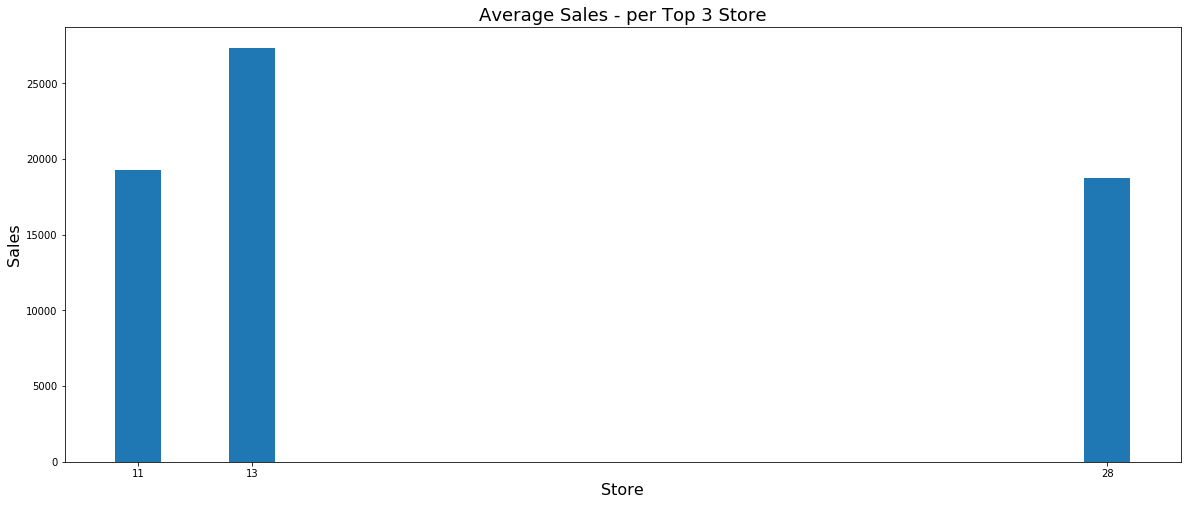

In [31]:
weekly_sales = train_top3['Weekly_Sales'].groupby(train_top3['Store']).mean()
plt.figure(figsize=(20,8))
plt.bar(weekly_sales.index, weekly_sales.values)
#plt.grid()
plt.xticks(tick_locations)
plt.title('Average Sales - per Top 3 Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

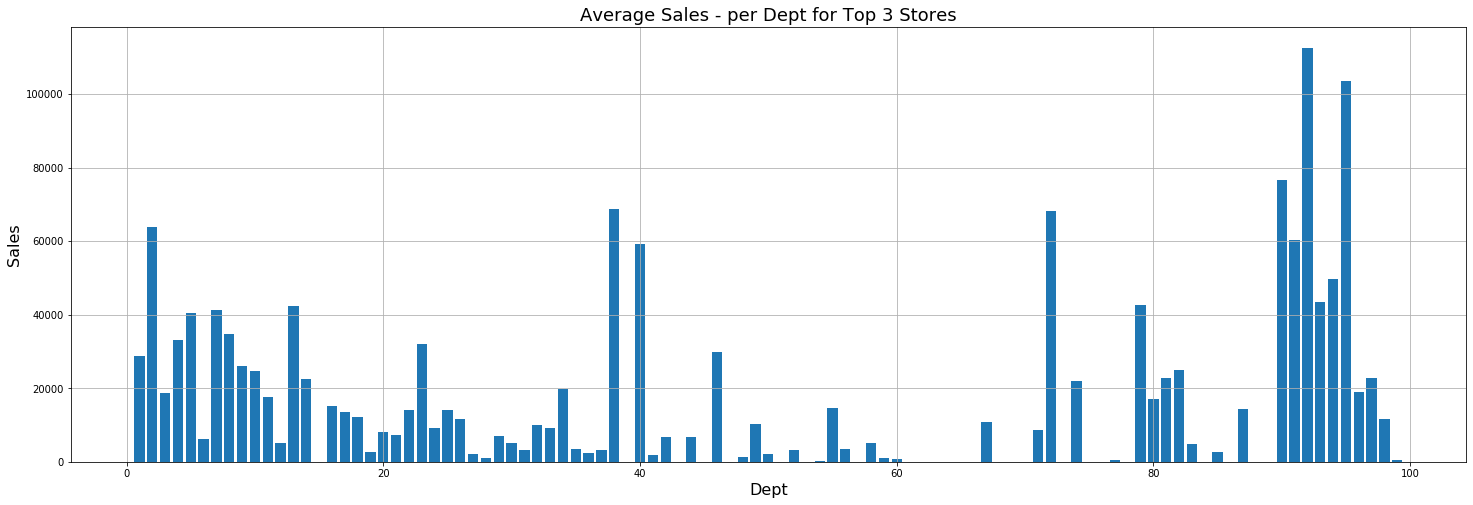

In [22]:
weekly_sales = train_top3['Weekly_Sales'].groupby(train_top3['Dept']).mean()
plt.figure(figsize=(25,8))
plt.bar(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Dept for Top 3 Stores', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()

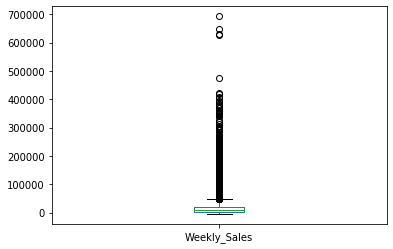

In [8]:
train['Weekly_Sales'].plot.box()